In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data

In [529]:
data_consumption = pd.read_csv('Filecoin Green Energy Consumption.csv', sep=",", header=0, index_col='Date', parse_dates=True)
price_data = pd.read_csv('FIL.csv', sep=",", header=0, index_col='Date', parse_dates=True)

In [530]:
data_consumption.head()

,Data storage capacity,Data storage capacity added per day,Cumulative renewable energy purchases,Energy intensity lower bound,Energy intensity estimate,Energy intensity upper bound,Energy consumption rate lower bound,Energy consumption rate estimate,Energy consumption rate upper bound,Energy used to seal data lower bound,Energy used to seal data estimate,Energy used to seal data upper bound,Cumulative energy use lower bound,Cumulative energy use estimate,Cumulative energy use upper bound,Energy used to store data lower bound,Energy used to store data estimate,Energy used to store data upper bound
Date,,,,,,,,,,,,,,,,,,
2020-08-24 00:00:00+00:00,498448,2053024,1.573466e+07,1404.098113,10618.245613,21402.982537,651.804634,4929.158175,9935.604259,551.893912,3137.985593,5143.646330,15643.178933,1.182999e+05,2.384543e+05,0.482896,1.605601,4.335152
2020-08-25 00:00:00+00:00,9237744,13984256,1.602074e+07,516.832219,3906.016457,7877.754829,4446.472725,33604.707651,67774.841938,3759.247698,21374.515768,35036.154982,122357.623348,9.248137e+05,1.865049e+06,8.949526,29.756621,80.343431
2020-08-26 00:00:00+00:00,22553828,13212864,1.630683e+07,200.762976,1514.930303,3059.685608,4217.004054,31820.943107,64268.357067,3551.882100,20195.466238,33103.509466,223564.869363,1.688517e+06,3.407488e+06,21.850149,72.650391,196.157408
2020-08-27 00:00:00+00:00,36361328,14277536,1.659291e+07,134.966149,1017.172660,2056.697582,4570.510617,34445.662719,69648.265260,3838.087228,21822.785450,35770.938694,333256.204294,2.515214e+06,5.079045e+06,35.226855,117.127110,316.245378
2020-08-28 00:00:00+00:00,51427203,16174560,1.687900e+07,108.350558,815.823835,1650.977121,5189.484114,39074.139636,79074.069443,4348.045219,24722.329723,40523.742624,457802.780943,3.452994e+06,6.976821e+06,49.822674,165.657306,447.277813


In [531]:
price_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-13,11.474800,11.507300,11.0188,11.503200,11.503200,296217
2017-12-14,11.483200,11.804200,10.9543,11.481600,11.481600,391397
2017-12-15,11.480900,13.001400,11.1526,12.900500,12.900500,653202
2017-12-16,12.900500,21.955000,12.8705,20.495501,20.495501,2137330
2017-12-17,20.502399,20.502399,17.8407,19.435400,19.435400,624487


# Correlation between price and added storage capacity

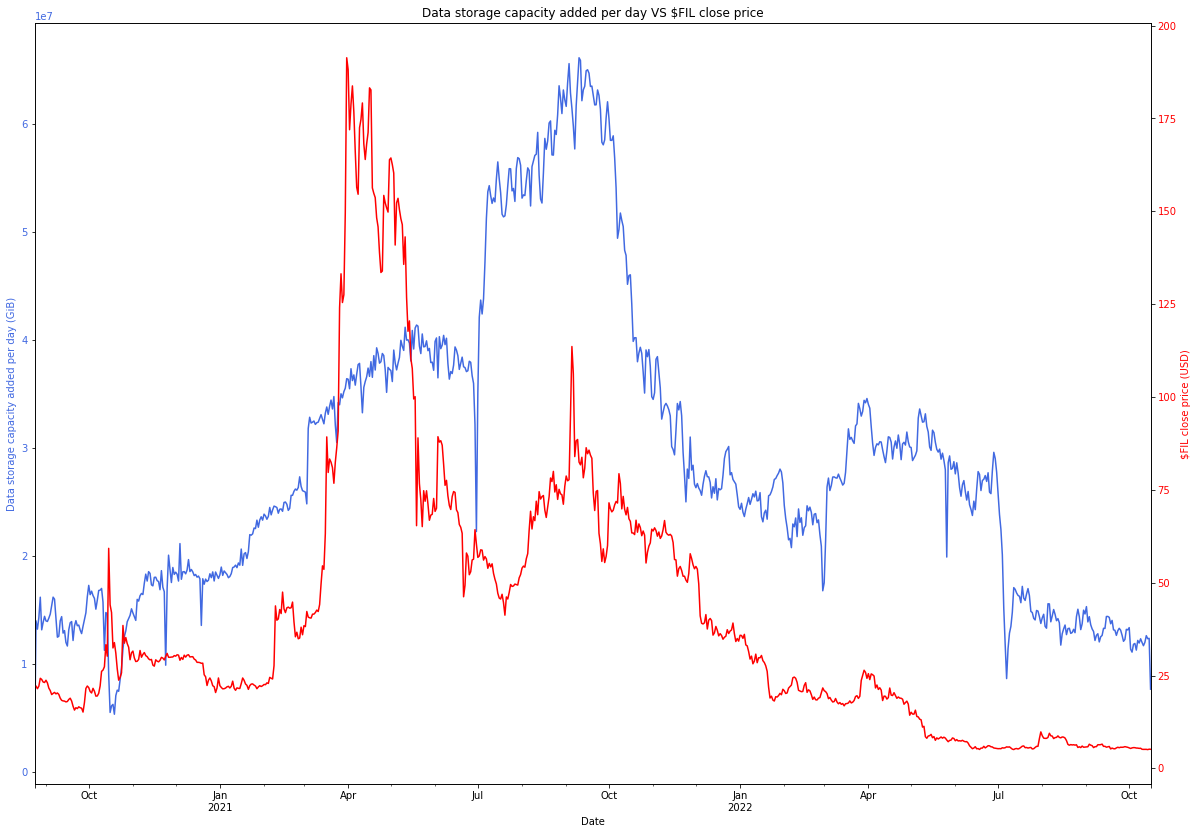

In [532]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('time (s)')
ax1.set_ylabel("Data storage capacity added per day (GiB)", color='royalblue')
data_consumption.loc['2020-08-24':'2022-10-16','Data storage capacity added per day'].plot(figsize=(20,14), c='royalblue') 
ax1.tick_params(axis='y', labelcolor='royalblue')
ax2 = ax1.twinx()

ax2.set_ylabel('$FIL close price (USD)', color='red')
price_data.loc['2020-08-24':'2022-10-16','Close'].resample('1d').mean().plot(c='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Data storage capacity added per day VS $FIL close price')

plt.show()

In [533]:
df1 = data_consumption.loc['2020-08-24':'2022-10-16','Data storage capacity added per day']
df2 = price_data.loc['2020-08-24':'2022-10-16','Close'].reset_index(drop=True)
merged_df = pd.concat([df2.reset_index(), df1.reset_index()], ignore_index=True, axis=1)[[2,1,3]]
merged_df[2] = pd.to_datetime(merged_df[2])
merged_df.set_index(2, inplace=True)
merged_df.head()

,1,3
2,,
2020-08-24 00:00:00+00:00,22.020189,2053024
2020-08-25 00:00:00+00:00,22.193523,13984256
2020-08-26 00:00:00+00:00,21.462585,13212864
2020-08-27 00:00:00+00:00,22.159378,14277536
2020-08-28 00:00:00+00:00,24.273489,16174560


In [534]:
Correlation = np.corrcoef(merged_df.T)
print("Correlation between price and added storage capacity =", Correlation[0,1]*100, "%")

Correlation between price and added storage capacity = 58.36671865917775 %


# Price shift to match added storage capacity 

In [535]:
df1_2 = data_consumption.loc['2020-08-24':'2022-10-16','Data storage capacity added per day']
df2_2 = price_data.loc['2020-04-29':'2022-06-21','Close'].reset_index(drop=True)

In [536]:
merged_df_2 = pd.concat([df2_2.reset_index(), df1_2.reset_index()], ignore_index=True, axis=1)[[2,1,3]]
merged_df_2[2] = pd.to_datetime(merged_df_2[2])
merged_df_2.set_index(2, inplace=True)
merged_df_2.head()

,1,3
2,,
2020-08-24 00:00:00+00:00,6.232626,2053024
2020-08-25 00:00:00+00:00,5.241865,13984256
2020-08-26 00:00:00+00:00,6.211839,13212864
2020-08-27 00:00:00+00:00,5.364868,14277536
2020-08-28 00:00:00+00:00,5.284130,16174560


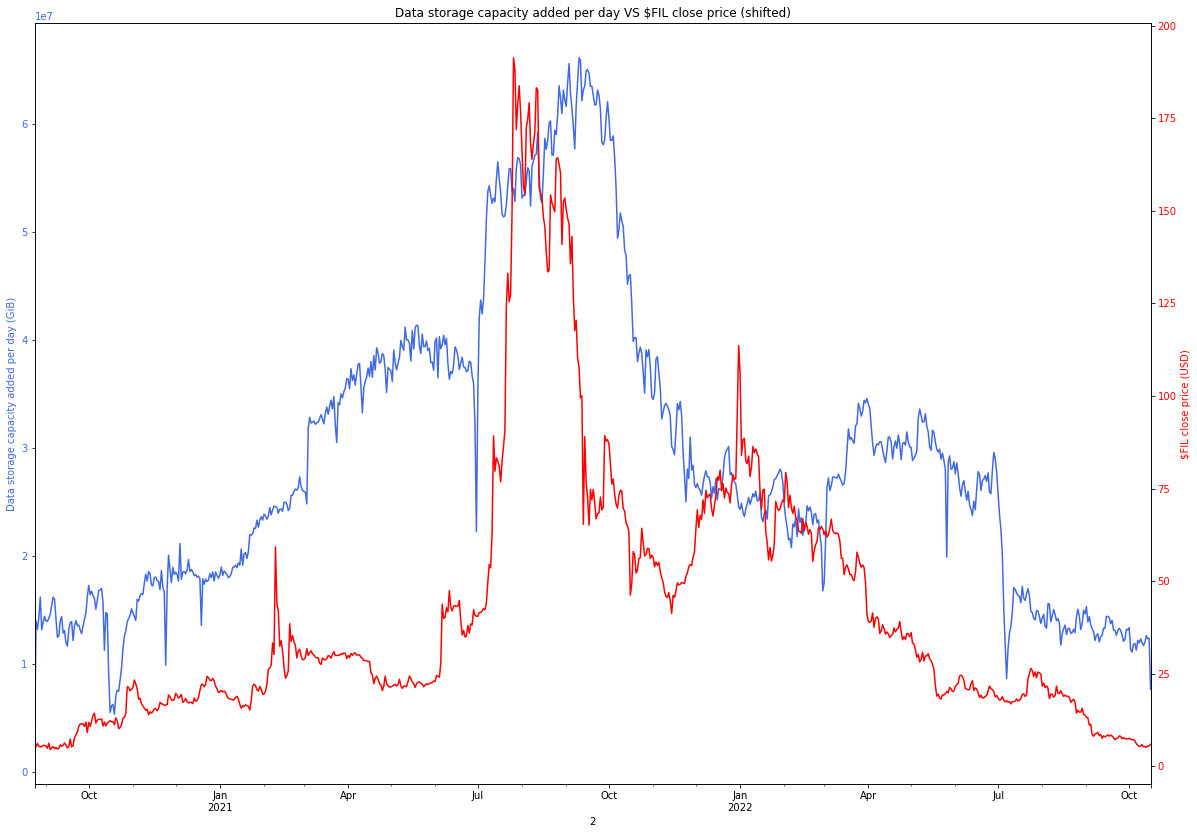

In [537]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("Data storage capacity added per day (GiB)", color='royalblue')
merged_df_2.loc['2020-08-24':'2022-10-16',3].plot(figsize=(20,14), c='royalblue') 
ax1.tick_params(axis='y', labelcolor='royalblue')
ax2 = ax1.twinx()

ax2.set_ylabel('$FIL close price (USD)', color='red')
merged_df_2.loc['2020-08-24':'2022-10-16',1].resample('1d').mean().plot(c='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Data storage capacity added per day VS $FIL close price (shifted)')

plt.show()

In [538]:
Correlation_2 = np.corrcoef(merged_df_2.T)
print("Correlation between shifted price and added storage capacity =", Correlation_2[0,1]*100, "%")

Correlation between shifted price and added storage capacity = 72.68353504811132 %


In [539]:
print("Thanks to the price shift, we have increased the correlation by", (Correlation_2[0,1] - Correlation[0,1])*100, "%")
print("The added storage capacity therefore varies according to the $FIL price but with a delay of 117 days.")

Thanks to the price shift, we have increased the correlation by 14.316816388933573 %
The added storage capacity therefore varies according to the $FIL price but with a delay of 117 days.


# Machine learning models (prediction per day, per week and per month)

In [540]:
X_day = merged_df_2[1].resample('1d').mean().to_numpy().reshape(-1,1)
y_day = merged_df_2[3].resample('1d').mean().to_numpy().reshape(-1,1)

R² = 0.5282896267090031


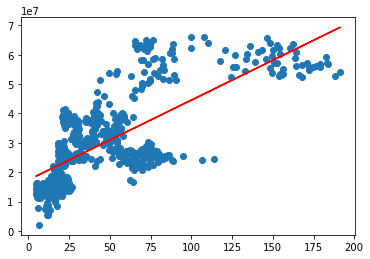

In [541]:
model_day = LinearRegression()
model_day.fit(X_day, y_day)
pred_day = model_day.predict(X_day)
plt.scatter(X_day, y_day) 
plt.plot(X_day, pred_day , c='r')
print("R² =", model_day.score(X_day, y_day))

In [542]:
X_week = merged_df_2[1].resample('1w').mean().to_numpy().reshape(-1,1)
y_week = merged_df_2[3].resample('1w').mean().to_numpy().reshape(-1,1)

R² = 0.5408645275483196


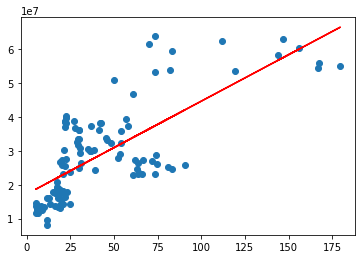

In [543]:
model_week = LinearRegression()
model_week.fit(X_week, y_week)
pred_week = model_week.predict(X_week)
plt.scatter(X_week, y_week) 
plt.plot(X_week, pred_week , c='r')
print("R² =", model_week.score(X_week, y_week))

In [544]:
X_month = merged_df_2[1].resample('1m').mean().to_numpy().reshape(-1,1)
y_month = merged_df_2[3].resample('1m').mean().to_numpy().reshape(-1,1)

R² = 0.615347373920325


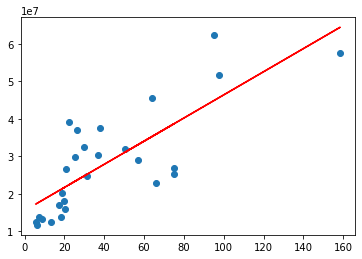

In [545]:
model_month = LinearRegression()
model_month.fit(X_month, y_month)
pred_month = model_month.predict(X_month)
plt.scatter(X_month, y_month)
plt.plot(X_month, pred_month , c='r')
print("R² =", model_month.score(X_month, y_month))

# Prediction of storage capacity added per day in December 2022

In [546]:
X_pred_day = price_data.loc['2022-08-06':'2022-09-05','Close'].resample('1d').mean().to_numpy().reshape(-1,1)

In [547]:
pred_day_2 = pd.DataFrame(model_day.predict(X_pred_day))
days = pd.DataFrame([i+1 for i in range(31)])
pred_plot = pd.concat([days, pred_day_2], ignore_index=True, axis=1)
pred_plot

,0,1
0,1,1.996045e+07
1,2,1.977523e+07
2,3,1.975616e+07
3,4,1.957396e+07
4,5,1.964246e+07
5,6,1.966053e+07
6,7,1.976776e+07
7,8,1.965695e+07
8,9,1.962733e+07
9,10,1.969138e+07


Text(0, 0.5, 'GiB')

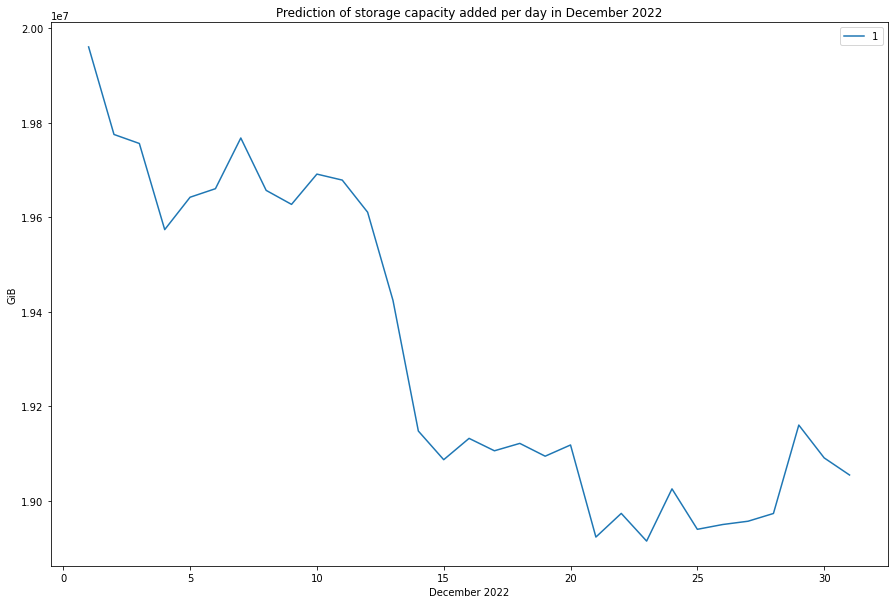

In [548]:
pred_plot.plot(x=0, y=1, figsize= (15,10))
plt.title("Prediction of storage capacity added per day in December 2022")
plt.xlabel("December 2022")
plt.ylabel("GiB")

# Forecasted storage capacity added per day on average in December 2022

In [549]:
X_pred_month = price_data.loc['2022-08-06':'2022-09-05','Close'].resample('1m').mean().to_numpy().reshape(-1,1)

In [550]:
print("The model predicts an average daily added storage capacity of", model_month.predict(X_pred_month)[0], "GiB for December 2022.")

The model predicts an average daily added storage capacity of [17805245.70830726] GiB for December 2022.
